# OUTLINE

[Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) is an approach to analyzing data sets to summarize and understand their main characteristics, often with visual methods.

EDA is a crucial step, where you will spend most of your time. Use your  your *Machine Learning Checklist* to guide you during the process. If you do not already have a checklist, here is one from [Aurélien Géron](10_20_2018_Machine-Learning-Project-Checklist.txt) that you can adapt to your needs.   

In these series of notebooks, we explore the Home Credit data set; cleansing, preprocessing and 
visualizing the data for downstream processes of a Data Science Workflow.  You can obtain all 
notebooks from [Github](https://github.com/chalendony/data-prep-visualization).

* [Python Imports](#Python-Imports)


* [Setup](#Setup)
    * Jupyter Extensions -- Scratchpad ...
    * Overview Data Set
    * Data Repository -- Quilt

* [Validate Data Types](#Validate-Data-Types)


* [Visualize Missing Data](#Visualize-Missing-Data)
    * Patterns in Missing Data -- missingno
    * Percent Missing
    
* [Discussion: Handling Missing Data](#Discussion:-Handling-Missing-Data)


* [Missing Numerical : Advances Exercise](#Missing-Numerical-:-Advanced-Exercise)


**--------- CHOOSE YOUR TOPIC ------------**

* [Simple Impute](#Exercise:-SimpleImpute-for-Categorical)
* [Neural Net to Impute Categoricals -- DataWig](Impute%20Categorical%20with%20DataWig.ipynb)
* [Impute Categorical: fastKNN](http://localhost:8888/notebooks/Impuyte%20fastKNN%20to%20Impute%20Missing%20Data.ipynb) -- Fill in missing code
* Impute Numerical: Neural Network - Self Guided 
* [Automatic Feature Generation -- Featuretools](Automated%20Feature%20Engineering%20with%20Featuretools.ipynb)
* [Piplelines](Pipeline.ipynb)
    * Feature Union
    * Column Transform
* [Reshaping Dataframes -- Self Assessment](Reshaping%20Dataframes%20Exercises.ipynb#Question-9:)
* [Groupby](Groupby.ipynb)
* [Indexing and Reshaping Dataframes](Indexing%20and%20Reshaping%20Dataframes.ipynb)
* [Interactive Visualizaton - Plotly](Interactive%20Visualization.ipynb)


# Python Imports

In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', 125)
import quilt
from scripts.preprocess import percent_missing, as_dict
from string import Template
import missingno as msno
%matplotlib inline

# Setup

## Jupyter Extensions

* Several Jupyter Notebook extensions will be useful for this workshop:
    * Table of Contents : navigate the notebook topics
    * Exercise : completing inline exercises
    * [Scratchpad](http://localhost:8888/notebooks/Data%20Cleansing.ipynb): execute code against the current kernel without modifying the notebook document


__Ensure these extensions are working.__

## Overview Data Set

The [data](https://www.kaggle.com/c/home-credit-default-risk/data) is provided by Home Credit,  a service dedicated to providing loans. 

![home_credit.png](images/home_credit.png)

## Data Repository - _Quilt_

* You probably perform most of your analysis locally, but cloud-based workflows have benefits
* Will our day-to-day workflow become cloud-native? ... Time will tell, so stay tuned!
* __NOTE:__ since we are using publc data that is  __*not*__  sensitive, we can use a public cloud
* The environment for this workshop looks like this: 

![workshop_env.png](images/workshop_env.png)

###  Install Quilt Package in Local Repository

* Install the package in a local repository on your machine,  __once, per version of the data__ 
* Use a hash, if you want to download a specific  version of the data

In [7]:
quilt.install("avare/homecredit", hash="1266d85da94de98efe04a61beb6b028db90ad703155b28b550fbfb79e9b8fb7e")

  0%|          | 0.00/707M [00:00<?, ?B/s]

100%|██████████| 707M/707M [02:58<00:00, 3.96MB/s] 


### Import Quilt Packages from Local Repository 

In [1]:
from quilt.data.avare import homecredit

### Working with a Quilt Package


_What have we just imported, what is in the Quilt `homecredit` package?_

* The metaphor used by Quilt is similar to the tree structre of a filesystem on your computer
* `avare` is a user, and under this user, there is a pacakge: `homecredit`
* Inside the `homecredit` package, there are several nodes 
* In this repository, the nodes are all python dataframes

Links:

* [Working with Quilt](https://github.com/quiltdata/quilt/blob/master/docs/api-python.md#work-with-package-contents)

* [Quilt Python API](https://github.com/quiltdata/quilt/blob/master/docs/api-python.md#python-api)


In [2]:
homecredit

<GroupNode>
POS_CASH_balance
application_train
bureau
bureau_balance
credit_card_balance
installments_payments
previous_application

###  Working with Quilt Dataframes

* Quilt uses parenthesis to access a dataframes in a package
* Otherwise, we are just handling a Pandas dataframe
* Note: your changes to the Quilt dataframes only exist in memory, until you use the Quilt API to `build` and `push`. For an exmaple, see: [QuiltSetup](Quilt%20Setup%20HomeCredit%20Data.ipynb)

In [3]:
df = homecredit.application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#homecredit.application_train().info(null_counts=True,verbose=True)

# Validate Data Types

Although types are inferred by Panda, we need to validate them, since the inferred ones may not be what you expect. 

For example:

* NFLAG_INSURED_ON_APPROVAL : (0,1) inferred by Pandas as integer, but actually is categorical

* SELLERPLACE_AREA : 4-digit code for a location, inferred by Pandas as integer, but actually is a nomimal

## Manually Assign Data Types

* The file `new_data_description_file` is used to help override the data types inferred by Pandas
* The file contains manualy assigned Python data types for each column, in all the tables in the homecredit data set

In [6]:
description = pd.read_csv('data/new_data_description_file.csv')
description.head()

,Row,Table,Type
0,SK_ID_PREV,POS_CASH_balance,object
1,SK_ID_CURR,POS_CASH_balance,object
2,MONTHS_BALANCE,POS_CASH_balance,float64
3,CNT_INSTALMENT,POS_CASH_balance,float64
4,CNT_INSTALMENT_FUTURE,POS_CASH_balance,float64


## Override Inferred Data Types

In [7]:
python_cat_dtype = 'object'
python_num_dtype = 'float64'
overide_dtypes = {}

for table, node in homecredit._items():
    
    print(table)
    
    df = node()
    
    condtable = description.Table == table
    condcat = description.Type == python_cat_dtype
    condnum = description.Type == python_num_dtype
        
    catcols = description.loc[(condtable & condcat),'Row'].values.tolist()
    numcols = description.loc[(condtable & condnum),'Row'].values.tolist()
    
    df[catcols] = df[catcols].astype(python_cat_dtype) 
    df[numcols] = df[numcols].astype(python_num_dtype)
    
    overide_dtypes[table] = description.loc[(condtable & condcat),['Row','Type']].append(description.loc[(condtable & condnum),['Row','Type']], ignore_index=True)

POS_CASH_balance
application_train
bureau
bureau_balance
credit_card_balance
installments_payments
previous_application


# Visualize Missing Data

## Patterns in Missing Data

[missingno](https://github.com/ResidentMario/missingno) is a tool for missing data visualizations:

* It allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset
* The `matrix()` function helps to detect patterns in data completion
* Note: Tool displays 50 columns maximum

In [26]:
%%html
<style>
table {float:left}
</style>

* Each of the following represent: Normalized information about building where the client lives, but more than 50% is missing data. See [Data Description](data/HomeCredit_columns_description.txt). 

|Columns| Total|Percent|
|---|---|---|
|FONDKAPREMONT_MODE| 156341 |50.840783 
|WALLSMATERIAL_MODE| 154297 |50.176091 
|WALLSMATERIAL_MODE| 154297 |50.176091 
|EMERGENCYSTATE_MODE|145755|47.398304

Let's see how this data looks using the missingno tool compared to other variables with less missing information.

### Table: Application

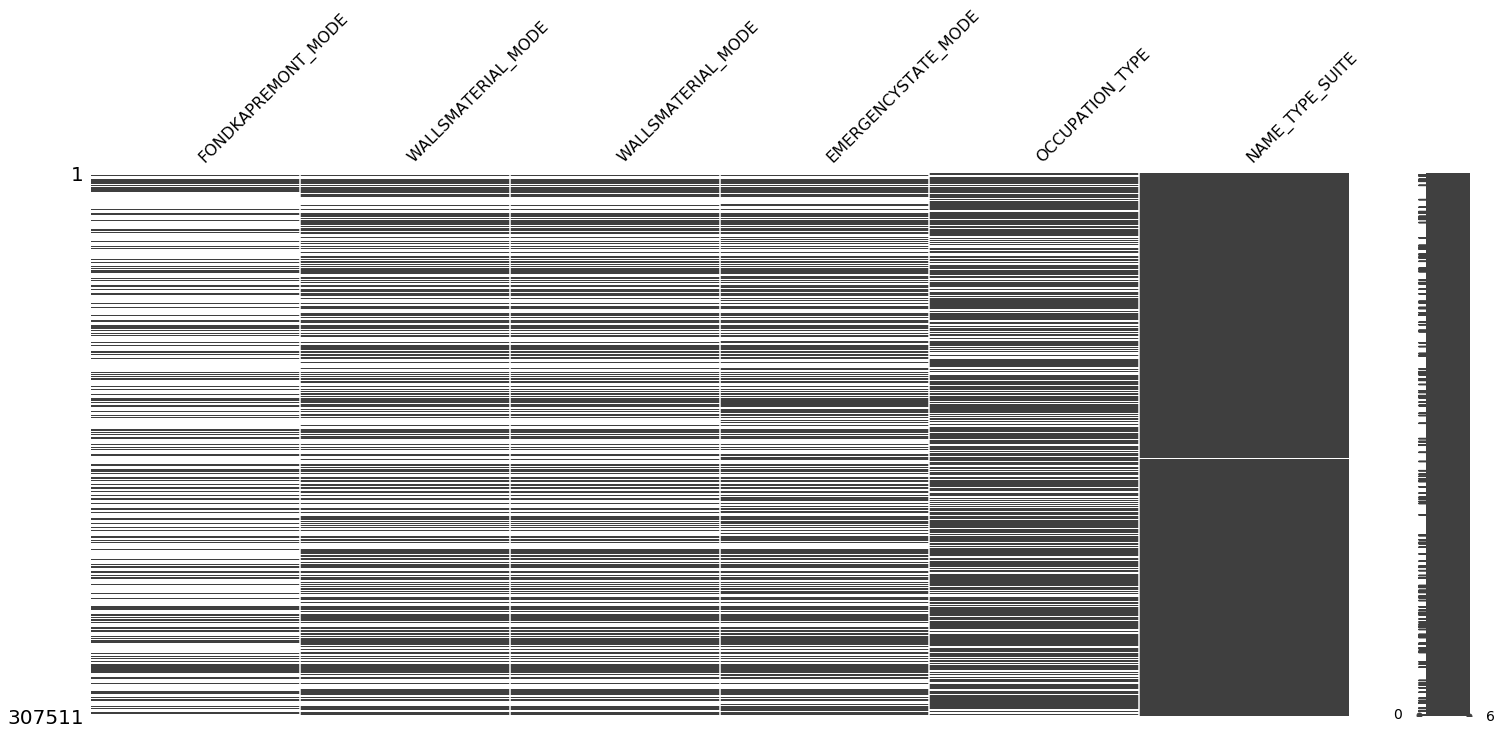

In [5]:
table = 'application_train'
df = homecredit[table]().loc[:,['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','WALLSMATERIAL_MODE',
                          'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE']]

msno.matrix(df) 

### Table : Previous Application

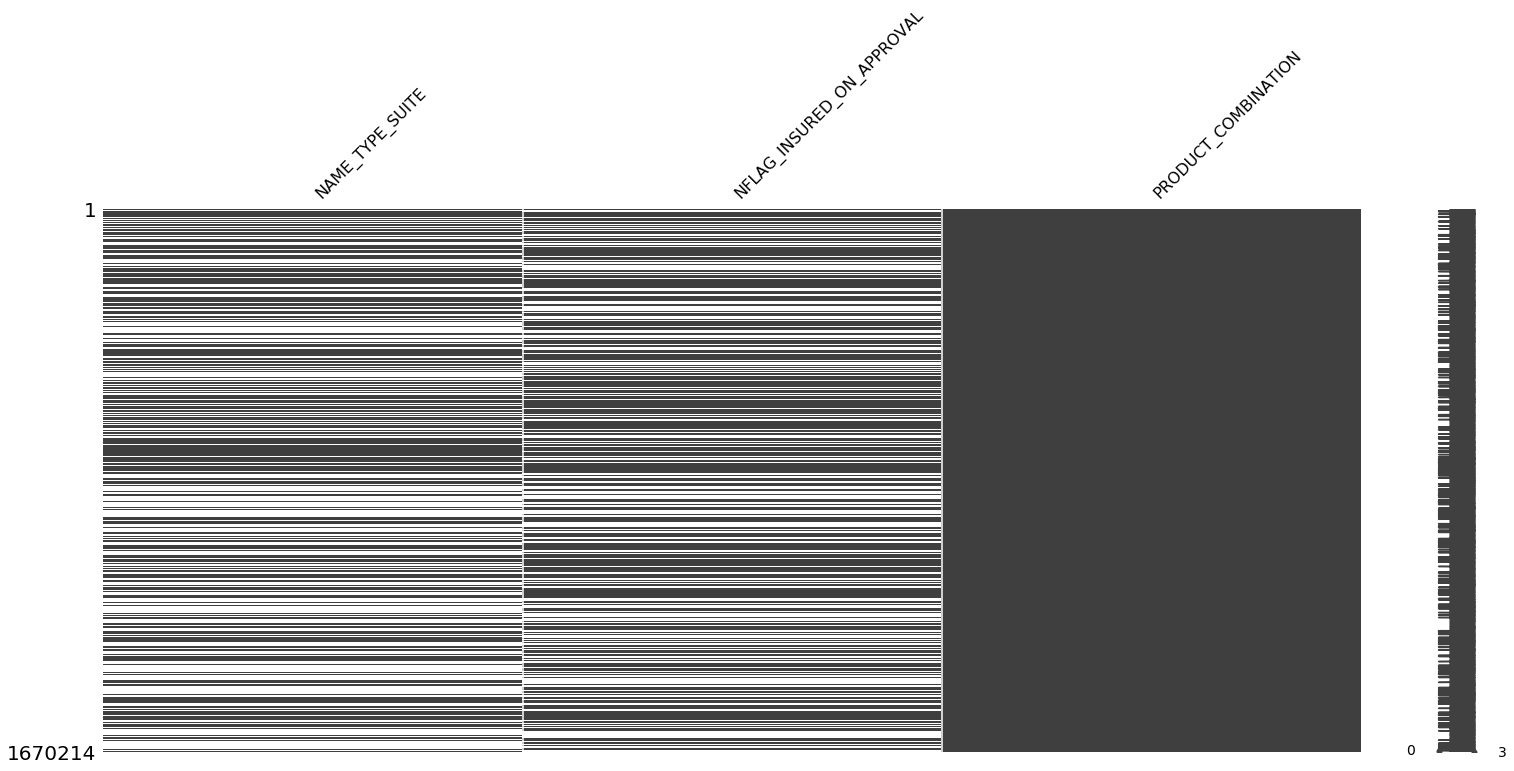

In [6]:
table = 'previous_application'
df = homecredit[table]().loc[:,['NAME_TYPE_SUITE','NFLAG_INSURED_ON_APPROVAL','PRODUCT_COMBINATION']]
msno.matrix(df) 

## Percent Missing 

If you need to see the missing data for than 50 columns, a table will help. 

* Experiment with the `threshold` variable below (a whole number) to decide which columns have a high percentage of missing values.

In [34]:
threshold = 50 # integer percent
s = Template(""" Perc_Missing >= ${threshold} """)
    
for table, node in homecredit._items():
    
    print('\nTable: {}'.format(table))
    df = node()   
    targetcols = [*df.columns.values]
    print(percent_missing(df, targetcols).query(s.substitute(threshold=threshold)))


Table: POS_CASH_balance
Empty DataFrame
Columns: [Total, Perc_Missing]
Index: []

Table: application_train
                           Total  Perc_Missing
COMMONAREA_MEDI           214865     69.872297
COMMONAREA_AVG            214865     69.872297
COMMONAREA_MODE           214865     69.872297
NONLIVINGAPARTMENTS_MODE  213514     69.432963
NONLIVINGAPARTMENTS_AVG   213514     69.432963
NONLIVINGAPARTMENTS_MEDI  213514     69.432963
FONDKAPREMONT_MODE        210295     68.386172
LIVINGAPARTMENTS_MODE     210199     68.354953
LIVINGAPARTMENTS_AVG      210199     68.354953
LIVINGAPARTMENTS_MEDI     210199     68.354953
FLOORSMIN_AVG             208642     67.848630
FLOORSMIN_MODE            208642     67.848630
FLOORSMIN_MEDI            208642     67.848630
YEARS_BUILD_MEDI          204488     66.497784
YEARS_BUILD_MODE          204488     66.497784
YEARS_BUILD_AVG           204488     66.497784
OWN_CAR_AGE               202929     65.990810
LANDAREA_MEDI             182590     59.376738

# Discussion: Handling Missing Data

The options for handling missing data depends on a number of factors: 
including the [type of missing data](https://www.displayr.com/different-types-of-missing-data/). Some options to handle missing data are:

* Drop columns with a high percentage of missing values

* Delete rows that have missing data

* Impute: fill in missing values: [Impute Strategies](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779)

* Use an algorithm, such as [XGBoost](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d), less sensitive to missing data
 
* Six different Ways https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779 


__Discussion__

* What options have you used in the past?
* Which options would you use now?


## Exercise: SimpleImpute for Categorical

___<font color=red> Exercise 2.</font>___ Assume that the missing categorical values can be imputed with the dedicatd symbol '999' that is not present in the data set. Use the Python [Simple Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer.transform) to fill in the missing categorical values with this symbol. 
* verify the return imputated result.

In [70]:
fillin = '999'
table = 'previous_application'
col = 'NAME_TYPE_SUITE'

df = homecredit.previous_application()[col]
print('Unimputed values: {} '.format(df.values))

simputer = SimpleImputer(missing_values=None,strategy="constant", fill_value=fillin, verbose= True)
simputer.fit(df.values.reshape(-1,1))
newsimputer = simputer.transform(df.values.reshape(-1,1)) 
print('Imputed values: {} '.format(newsimputer))

Unimputed values: [None 'Unaccompanied' 'Spouse, partner' ... 'Spouse, partner' 'Family'
 'Family'] 
Imputed values: [['999']
 ['Unaccompanied']
 ['Spouse, partner']
 ...
 ['Spouse, partner']
 ['Family']
 ['Family']] 


[['999']
 ['Unaccompanied']
 ['Spouse, partner']
 ...
 ['Spouse, partner']
 ['Family']
 ['Family']]


## Neural Net to Impute Categorical

* [Datawig](https://datawig.readthedocs.io/en/latest/source/userguide.html) deep learning imputation approach. 

Some Advances:
* takes a dataframe as input 
* impute categorical, as well as non-numerical data: including unstructured text and categorical data
* performs hyperparameter optimization
* can select columns on which to train
* scales, unlike imputing with KNN

* Check how well a imputation strategy works on the 'previous_application' table for the `PRODUCT_COMBINATION` in the [Impute Categorical with DataWig](Impute%20Categorical%20DataWig.ipynb) notebook


# Impute Numericals : Advanced Exercise

Have a look at the DataWig example for [imputing numerical values](https://github.com/awslabs/datawig/blob/master/README.md#imputation-of-numerical-columns), then use the Homecredit data to impute a numerical column.